# **DataCamp.Course_054_Hypothesis Testing in Python**

### **Course Description**

Hypothesis testing lets you answer questions about your datasets in a statistically rigorous way. In this course, you'll grow your Python analytical skills as you learn how and when to use common tests like t-tests, proportion tests, and chi-square tests. Working with real-world data, including Stack Overflow user feedback and supply-chain data for medical supply shipments, you'll gain a deep understanding of how these tests work and the key assumptions that underpin them. You'll also discover how non-parametric tests can be used to go beyond the limitations of traditional hypothesis tests.

In [2]:
# read_feather function

import os
import pandas as pd
folder_name = 'datasets'
dir = r'C:\Users\mcaba\OneDrive\Escritorio\Data Science\Datacamp_Notebook\Datacamp_Notebook\{}'.format(folder_name)

def read_feather_fun(folder_name,file_name, path):
    path = dir
    os.chdir(path)
    df = pd.read_feather('{}.feather'.format(file_name))
    return df

stack_overflow = read_feather_fun('datasets','stack_overflow', dir)
display(stack_overflow.head(2))

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30


In [3]:
dem_votes_potus_12_16 = read_feather_fun('datasets','dem_votes_potus_12_16', dir)
display(dem_votes_potus_12_16.head(2))

,state,county,dem_percent_12,dem_percent_16
0,Alabama,Bullock,76.305900,74.946921
1,Alabama,Chilton,19.453671,15.847352


In [4]:
late_shipments = read_feather_fun('datasets','late_shipments', dir)
display(late_shipments.head(2))

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2996.0,266644.0,89.0,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,25.0,800.0,32.0,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72


In [5]:
repub_votes_potus_08_12 = read_feather_fun('datasets','repub_votes_potus_08_12', dir)
display(repub_votes_potus_08_12.head(2))

,state,county,repub_percent_08,repub_percent_12
0,Alabama,Hale,38.957877,37.139882
1,Arkansas,Nevada,56.726272,58.983452


## **Hypothesis Testing Fundamentals (Module 01-054)**

#### **Hypothesis tests and z-scores**

1. A/B testing
In 2013, Electronic Arts (EA) released SimCity 5
    They wanted to increase pre-orders of the
    game
    They used A/B testing to test different
    advertising scenarios
    This involves splitting users into control and
    treatment groups

A/B test results
The treatment group (no ad) got 43.4% more purchases than the control group (with ad)
    Intuition that "showing an ad would increase sales" was false
    Was this result statistically significant or just chance?
    Need EA's data to determine this
    Techniques from Sampling in Python + this course to do so

2. Stack Overflow Developer Survey 2020

import pandas as pd
print(stack_overflow)

3. Hypothesizing about the mean

A hypothesis:
The mean annual compensation of the population of data scientists is $110,000
The point estimate (sample statistic):
mean_comp_samp = stack_overflow['converted_comp'].mean()

4. Generating a bootstrap distribution

import numpy as np
# Step 3. Repeat steps 1 & 2 many times, appending to a list
so_boot_distn = []
for i in range(5000):
    so_boot_distn.append(
    # Step 2. Calculate point estimate
        np.mean(
            # Step 1. Resample
            stack_overflow.sample(frac=1, replace=True)['converted_comp']
        )
)

5. Visualizing the bootstrap distribution

import matplotlib.pyplot as plt
plt.hist(so_boot_distn, bins=50)
plt.show()

6. Standard error

std_error = np.std(so_boot_distn, ddof=1)

7. z-scores

standardized value = (value)-(mean) / (standard deviation)

z = (sample stat)-(hypoth.param.value) / (standard error)

stack_overflow['converted_comp'].mean()

mean_comp_hyp = 110000

z_score = (mean_comp_samp - mean_comp_hyp) / std_error

8. Testing the hypothesis

Is 1.707 a high or low number?
This is the goal of the course!
Hypothesis testing use case:
Determine whether sample statistics are close to or far 
away from expected (or"hypothesized" values)

9. Standard normal (z) distribution

Standard normal distribution: normal distribution with mean = 0 + standard deviation = 1

119574.71738168952


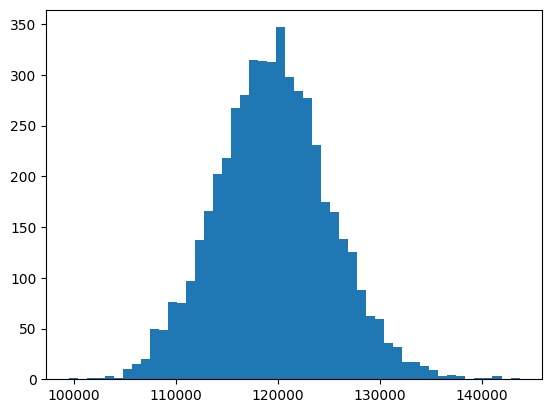

5557.167312695083


In [6]:
# A hypothesis:
# The mean annual compensation of the population of data scientists is $110,000
# The point estimate (sample statistic):

mean_comp_samp = stack_overflow['converted_comp'].mean()
print(mean_comp_samp)

import numpy as np
# Step 3. Repeat steps 1 & 2 many times, appending to a list
so_boot_distn = []
for i in range(5000):
    so_boot_distn.append(
    # Step 2. Calculate point estimate
        np.mean(
            # Step 1. Resample
            stack_overflow.sample(frac=1, replace=True)['converted_comp']
        )
)

import matplotlib.pyplot as plt
plt.hist(so_boot_distn, bins=50)
plt.show()

std_error = np.std(so_boot_distn, ddof=1)
print(std_error)

In [7]:
print(stack_overflow['converted_comp'].mean())

mean_comp_hyp = 110000

z_score = (mean_comp_samp - mean_comp_hyp) / std_error

print(z_score)


119574.71738168952
1.722949273061572


Calculating the sample mean
The late_shipments dataset contains supply chain data on the delivery of medical supplies. Each row represents one delivery of a part. The late columns denotes whether or not the part was delivered late. A value of "Yes" means that the part was delivered late, and a value of "No" means the part was delivered on time.

You'll begin your analysis by calculating a point estimate (or sample statistic), namely the proportion of late shipments.

In pandas, a value's proportion in a categorical DataFrame column can be quickly calculated using the syntax:

prop = (df['col'] == val).mean()
late_shipments is available, and pandas is loaded as pd.

In [8]:
# Print the late_shipments dataset
print(late_shipments)

# Calculate the proportion of late shipments
late_prop_samp = (late_shipments['late'] == "Yes").mean()

# Print the results
print(late_prop_samp)

          id       country managed_by  fulfill_via vendor_inco_term  \
0    36203.0       Nigeria   PMO - US  Direct Drop              EXW   
1    30998.0      Botswana   PMO - US  Direct Drop              EXW   
2    69871.0       Vietnam   PMO - US  Direct Drop              EXW   
3    17648.0  South Africa   PMO - US  Direct Drop              DDP   
4     5647.0        Uganda   PMO - US  Direct Drop              EXW   
..       ...           ...        ...          ...              ...   
995  13608.0        Uganda   PMO - US  Direct Drop              DDP   
996  80394.0    Congo, DRC   PMO - US  Direct Drop              EXW   
997  61675.0        Zambia   PMO - US  Direct Drop              EXW   
998  39182.0  South Africa   PMO - US  Direct Drop              DDP   
999   5645.0      Botswana   PMO - US  Direct Drop              EXW   

    shipment_mode  late_delivery late product_group    sub_classification  \
0             Air            1.0  Yes          HRDT              HIV t

Calculating a z-score
Since variables have arbitrary ranges and units, we need to standardize them. For example, a hypothesis test that gave different answers if the variables were in Euros instead of US dollars would be of little value. Standardization avoids that.

One standardized value of interest in a hypothesis test is called a z-score. To calculate it, you need three numbers: the sample statistic (point estimate), the hypothesized statistic, and the standard error of the statistic (estimated from the bootstrap distribution).

The sample statistic is available as late_prop_samp.

late_shipments_boot_distn is a bootstrap distribution of the proportion of late shipments, available as a list.

pandas and numpy are loaded with their usual aliases.

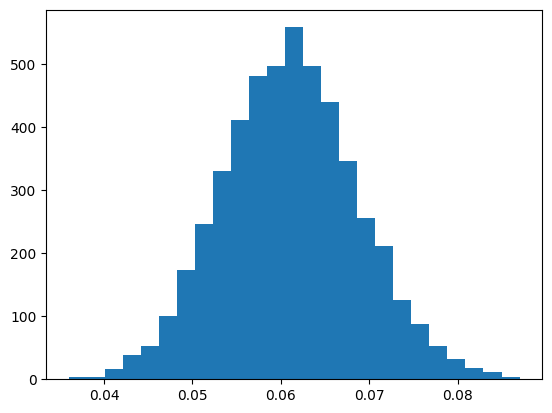

In [9]:
late_shipments['is_late'] = late_shipments['late'].apply(
    lambda x: 1 if x == 'Yes' else 0
)

late_shipments_boot_distn = []
for i in range(5000):
    late_shipments_boot_distn.append(
    # Step 2. Calculate point estimate
        np.mean(
            # Step 1. Resample
            late_shipments.sample(frac=1, replace=True)['is_late']
        )
)

import matplotlib.pyplot as plt
plt.hist(late_shipments_boot_distn, bins=25)
plt.show()

In [10]:
# Hypothesize that the proportion is 6%
late_prop_hyp = 0.06

# Calculate the standard error
std_error = np.std(late_shipments_boot_distn, ddof=1)

# Find z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp) / std_error


# Print z_score
print(z_score)

0.13301226293073756


#### **p-values**

1. Criminal trials

Two possible true states:
        1. Defendant committed the crime
        2. Defendant did not commit the crime
Two possible verdicts:
        1. Guilty
        2. Not guilty
    Initially the defendant is assumed to be not guilty
    
2. Age of first programming experience

age_first_code_cut classifies when Stack Overflow user first started programming
    "adult" means they started at 14 or older
    "child" means they started before 14
Previous research: 35% of software developers started programming as children
Evidence that a greater proportion of data scientists starting programming as children?

3. Definitions

A hypothesis is a statement about an unknown population parameter
A hypothesis test is a test of two competing hypotheses
The null hypothesis (H0 ) is the existing idea
The alternative hypothesis (Ha ) is the new "challenger" idea of the researcher
For our problem:
H0 : The proportion of data scientists starting programming as children is 35%
Ha : The proportion of data scientists starting programming as children is greater than 35%

4. Criminal trials vs. hypothesis testing

Either Ha or H0 is true (not both)
Initially, H0 is assumed to be true
The test ends in either "reject H0 " or "fail to reject H0 "
If the evidence from the sample is "significant" that Ha is true, reject H0 , else choose H0
Significance level is "beyond a reasonable doubt" for hypothesis testing

5. One-tailed and two-tailed tests

Hypothesis tests check if the sample statistics
lie in the tails of the null distribution

Test                                            Tails
alternative different from null             two-tailed
alternative greater than null               right-tailed
alternative less than null                  left-tailed

Ha : The proportion of data scientists starting
programming as children is greater than 35%
This is a right-tailed test

p-values: probability of obtaining a result,
assuming the null hypothesis is true

Large p-value, large support for H0
Statistic likely not in the tail of the null
distribution

Small p-value, strong evidence against H0
Statistic likely in the tail of the null
distribution

"p" in p-value → probability
"small" means "close to zero"

6. Calculating the z-score

prop_child_samp = (stack_overflow['age_first_code_cut'] == "child").mean()

prop_child_hyp = 0.35

std_error = np.std(first_code_boot_distn, ddof=1)

z_score = (prop_child_samp - prop_child_hyp) / std_error

7. Calculating the p-value

norm.cdf() is normal CDF from scipy.stats .
Left-tailed test → use norm.cdf() .
Right-tailed test → use 1 - norm.cdf() .

from scipy.stats import norm
1 - norm.cdf(z_score, loc=0, scale=1)

In [11]:
stack_overflow['is_child'] = stack_overflow['age_first_code_cut'].apply(
    lambda x: 1 if x == 'child' else 0
)

first_code_boot_distn = []
for i in range(5000):
    first_code_boot_distn.append(
    # Step 2. Calculate point estimate
        np.mean(
            # Step 1. Resample
            stack_overflow.sample(frac=1, replace=True)['is_child']
        )
)

prop_child_samp = (stack_overflow['age_first_code_cut'] == "child").mean()

prop_child_hyp = 0.35

std_error = np.std(first_code_boot_distn, ddof=1)

z_score = (prop_child_samp - prop_child_hyp) / std_error

print(prop_child_hyp)
print(std_error)
print(z_score)

from scipy.stats import norm
p_value = 1 - norm.cdf(z_score, loc=0, scale=1)
print(p_value)

0.35
0.010228691325330903
4.049367066388713
2.567816980525439e-05


Calculating p-values
In order to determine whether to choose the null hypothesis or the alternative hypothesis, you need to calculate a p-value from the z-score.

You'll now return to the late shipments dataset and the proportion of late shipments.

The null hypothesis, 
, is that the proportion of late shipments is six percent.

The alternative hypothesis, 
, is that the proportion of late shipments is greater than six percent.

The observed sample statistic, late_prop_samp, the hypothesized value, late_prop_hyp (6%), and the bootstrap standard error, std_error are available. norm from scipy.stats has also been loaded without an alias.

In [12]:
# Calculate the z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp) / std_error

# Calculate the p-value
p_value = 1 - norm.cdf(z_score, loc=0, scale=1)
                 
# Print the p-value
print(p_value) 


0.4610597608973196


#### **Statistical significance**

1. p-value recap
p-values quantify evidence for the null hypothesis
Large p-value → fail to reject null hypothesis
Small p-value → reject null hypothesis
Where is the cutoff point?

2. Significance level
The significance level of a hypothesis test (α) is the threshold point for "beyond a
reasonable doubt"
Common values of α are 0.2 , 0.1 , 0.05 , and 0.01
If p ≤ α, reject H , else fail to reject H
α should be set prior to conducting the hypothesis test

3. Calculating the p-value
alpha = 0.05
prop_child_samp = (stack_overflow['age_first_code_cut'] == "child").mean()
prop_child_hyp = 0.35
std_error = np.std(first_code_boot_distn, ddof=1)
z_score = (prop_child_samp - prop_child_hyp) / std_error
p_value = 1 - norm.cdf(z_score, loc=0, scale=1)

4. Making a decision

alpha = 0.05
print(p_value)
3.1471479512323874e-05
p_value <= alpha
True
Reject H0 in favor of HA

5. Confidence intervals

For a significance level of α, it's common to choose a confidence interval level of 1 - α
α = 0.05 → 95% confidence interval
import numpy as np
lower = np.quantile(first_code_boot_distn, 0.025)
upper = np.quantile(first_code_boot_distn, 0.975)
print((lower, upper))
(0.37063246351172047, 0.41132242370632466)

6. Types of errors

                        Truly didn't commit crime       Truly committed crime
Verdict not guilty      correct                         they got away with it
Verdict guilty          wrongful conviction             correct


                        actual H0                        actual Ha
chosen H0               correct                         false negative
chosen Ha               false                           positive correct

False positives are Type I errors; false negatives are Type II errors.

7. Possible errors in our example

If p ≤ α, we reject H :
    A false positive (Type I) error: data scientists didn't start coding as children at a higher rate
If p > α, we fail to reject H :
    A false negative (Type II) error: data scientists started coding as children at a higher rate


    If the null hypothesis is true and you rejected it, you've committed a type I error.

In [13]:
alpha = 0.05
prop_child_samp = (stack_overflow['age_first_code_cut'] == "child").mean()
prop_child_hyp = 0.35
std_error = np.std(first_code_boot_distn, ddof=1)
z_score = (prop_child_samp - prop_child_hyp) / std_error
p_value = 1 - norm.cdf(z_score, loc=0, scale=1)

print(p_value) 

print(p_value <= alpha)
## Reject H0 in favor of HA

2.567816980525439e-05
True


In [14]:
import numpy as np
lower = np.quantile(first_code_boot_distn, 0.025)
upper = np.quantile(first_code_boot_distn, 0.975)
print((lower, upper))

(0.3715170278637771, 0.41132242370632466)


Calculating a confidence interval
If you give a single estimate of a sample statistic, you are bound to be wrong by some amount. For example, the hypothesized proportion of late shipments was 6%. Even if evidence suggests the null hypothesis that the proportion of late shipments is equal to this, for any new sample of shipments, the proportion is likely to be a little different due to sampling variability. Consequently, it's a good idea to state a confidence interval. That is, you say, "we are 95% 'confident' that the proportion of late shipments is between A and B" (for some value of A and B).

Sampling in Python demonstrated two methods for calculating confidence intervals. Here, you'll use quantiles of the bootstrap distribution to calculate the confidence interval.

late_prop_samp and late_shipments_boot_distn are available; pandas and numpy are loaded with their usual aliases.

In [15]:
# Calculate 95% confidence interval using quantile method
lower = np.quantile(late_shipments_boot_distn, 0.025)
upper = np.quantile(late_shipments_boot_distn, 0.975)

# Print the confidence interval
print((lower, upper))

(0.047, 0.076)


### complementary

https://www.youtube.com/watch?v=bJm2pt-mq2c

https://www.youtube.com/watch?v=1g3pCE_B12E&t=4s

https://www.youtube.com/watch?v=6XPPmv9HXJw

https://www.youtube.com/watch?v=DlwOTOydeyk

## **Two-Sample and ANOVA Tests (Module 02-054)**

#### **Performing t-tests**

https://www.youtube.com/watch?v=VekJxtk4BYM

1. Two-sample problems
Compare sample statistics across groups of a variable
converted_comp is a numerical variable
age_first_code_cut is a categorical variable with levels ( "child" and "adult" )
Are users who first programmed as a child compensated higher than those that started as
adults?

2. Hypotheses

H0 : The mean compensation (in USD) is the same for those that coded first as a child and those that coded first as an adult.
Ho : μchild = μadult
H : μchild − μadult = 0

Ha : The mean compensation (in USD) is greater for those that coded first as a child compared to those that coded first as an adult.
Ha : μchild > μadult
Ha : μchild − μadult > 0

3. Calculating groupwise summary statistics

stack_overflow.groupby('age_first_code_cut')['converted_comp'].mean()
age_first_code_cut
adult 111313.311047
child 132419.570621
Name: converted_comp, dtype: float64

4. Test statistics

Sample mean estimates the population mean
xbar - a sample mean
xbar_child - sample mean compensation for coding first as a child
xbar_adult - sample mean compensation for coding first as an adult
xbar_child − xbar_adult - a test statistic
z-score - a (standardized) test statistic

5. Standardizing the test statistic
z = sample stat − population parameter / standard error
t = difference in sample stats − difference in population parameters / standard error
t = (xbar_child − xbar_adult) - (μchild − μadult) /SE(x¯child − x¯adult)

SE(x¯child − x¯adult) ≈ √(schild^2/nchild) + (sadult^2/nadult)

s is the standard deviation of the variable
n is the sample size (number of observations/rows in sample)

if H0 : μchild − μadult = 0 -- asumiendo la hipotesis nula verdadera

t = (xbar_child − xbar_adult) - 0 /SE(x¯child − x¯adult)

t = (xbar_child − xbar_adult) / √(schild^2/nchild) + (sadult^2/nadult)

6. Calculations assuming the null hypothesis is true

xbar = stack_overflow.groupby('age_first_code_cut')['converted_comp'].mean()
adult 111313.311047
child 132419.570621
Name: converted_comp, dtype: float64 age_first_code_cut
s = stack_overflow.groupby('age_first_code_cut')['converted_comp'].std()
adult 271546.521729
child 255585.240115
Name: converted_comp, dtype: float64 age_first_code_cut
n = stack_overflow.groupby('age_first_code_cut')['converted_comp'].count()
adult 1376
child 885
Name: converted_comp, dtype: int64

7. Calculating the test statistic

t = (xbar_child − xbar_adult) / √(schild^2/nchild) + (sadult^2/nadult)

import numpy as np
numerator = xbar_child - xbar_adult
denominator = np.sqrt(s_child ** 2 / n_child + s_adult ** 2 / n_adult)
t_stat = numerator / denominator

1.8699313316221844

In [16]:
xbar = stack_overflow.groupby('age_first_code_cut')['converted_comp'].mean()
print(xbar)

s = stack_overflow.groupby('age_first_code_cut')['converted_comp'].std()
print(s)

n = stack_overflow.groupby('age_first_code_cut')['converted_comp'].count()
print(n)

age_first_code_cut
adult    111313.311047
child    132419.570621
Name: converted_comp, dtype: float64
age_first_code_cut
adult    271546.521729
child    255585.240115
Name: converted_comp, dtype: float64
age_first_code_cut
adult    1376
child     885
Name: converted_comp, dtype: int64


In [17]:
xbar_adult = xbar.iloc[0]
xbar_child = xbar.iloc[1]

s_adult = s.iloc[0]
s_child = s.iloc[1]

n_adult = n.iloc[0]
n_child = n.iloc[1]

import numpy as np
numerator = xbar_child - xbar_adult
denominator = np.sqrt(s_child ** 2 / n_child + s_adult ** 2 / n_adult)
t_stat = numerator / denominator

print(t_stat)

1.8699313316221844


Two sample mean test statistic
The hypothesis test for determining if there is a difference between the means of two populations uses a different type of test statistic to the z-scores you saw in Chapter 1. It's called "t", and it can be calculated from three values from each sample using this equation.

 
 t = (xbar_child − xbar_adult) / √(schild^2/nchild) + (sadult^2/nadult)
 

While trying to determine why some shipments are late, you may wonder if the weight of the shipments that were on time is less than the weight of the shipments that were late. The late_shipments dataset has been split into a "yes" group, where late == "Yes" and a "no" group where late == "No". The weight of the shipment is given in the weight_kilograms variable.

The sample means for the two groups are available as xbar_no and xbar_yes. The sample standard deviations are s_no and s_yes. The sample sizes are n_no and n_yes. numpy is also loaded as np.

In [18]:
xbar_shipment = late_shipments.groupby('late')['weight_kilograms'].mean()
print(xbar_shipment)

s_shipment = late_shipments.groupby('late')['weight_kilograms'].std()
print(s_shipment)

n_shipment = late_shipments.groupby('late')['weight_kilograms'].count()
print(n_shipment)

late
No     1897.791267
Yes    2715.672131
Name: weight_kilograms, dtype: float64
late
No     3154.039507
Yes    2544.688211
Name: weight_kilograms, dtype: float64
late
No     939
Yes     61
Name: weight_kilograms, dtype: int64


In [19]:
xbar_no = xbar_shipment.iloc[0]
xbar_yes = xbar_shipment.iloc[1]

s_no = s_shipment.iloc[0]
s_yes = s_shipment.iloc[1]

n_no = n_shipment.iloc[0]
n_yes = n_shipment.iloc[1]

In [20]:
# Calculate the numerator of the test statistic
numerator = xbar_no - xbar_yes

# Calculate the denominator of the test statistic
denominator = np.sqrt(s_no ** 2 / n_no + s_yes ** 2 / n_yes)

# Calculate the test statistic
t_stat = numerator / denominator

# Print the test statistic
print(t_stat)

-2.3936661778766433


#### **Calculating p-values from t-statistics**

1. t-distributions
t statistic follows a t-distribution
Have a parameter named degrees of freedom, or df
Look like normal distributions, with fatter tails
2. Degrees of freedom
Larger degrees of freedom → t-distribution
gets closer to the normal distribution
Normal distribution → t-distribution with
infinite df
Degrees of freedom: maximum number of
logically independent values in the data
sample
3. Calculating degrees of freedom
Dataset has 5 independent observations
Four of the values are 2, 6, 8, and 5
The sample mean is 5
The last value must be 4
Here, there are 4 degrees of freedom
df = nchild + nadult − 2
4. Hypotheses
H0: The mean compensation (in USD) is the same for those that coded first as a child and
those that coded first as an adult
Ha : The mean compensation (in USD) is greater for those that coded first as a child
compared to those that coded first as an adult
Use a right-tailed test
5. Significance level
α = 0.1
If p ≤ α then reject H0.
6. Calculating p-values: one proportion vs. a value
from scipy.stats import norm
1 - norm.cdf(z_score)

SE(x¯child − x¯adult) ≈ √(schild^2/nchild) + (sadult^2/nadult)
z-statistic: needed when using one sample statistic to estimate a population parameter
t-statistic: needed when using multiple sample statistics to estimate a population parameter

7. Calculating p-values: two means from different groups
numerator = xbar_child - xbar_adult
denominator = np.sqrt(s_child ** 2 / n_child + s_adult ** 2 / n_adult)
t_stat = numerator / denominator

degrees_of_freedom = n_child + n_adult - 2

Use t-distribution CDF not normal CDF
from scipy.stats import t
1 - t.cdf(t_stat, df=degrees_of_freedom)

Evidence that Stack Overflow data scientists who started coding as a child earn more.

In [21]:
from scipy.stats import norm
1 - norm.cdf(z_score)

2.567816980525439e-05

In [22]:
numerator = xbar_child - xbar_adult
denominator = np.sqrt(s_child ** 2 / n_child + s_adult ** 2 / n_adult)
t_stat = numerator / denominator
print(t_stat)

degrees_of_freedom = n_child + n_adult - 2
print(degrees_of_freedom)

1.8699313316221844
2259


In [23]:
from scipy.stats import t
1 - t.cdf(t_stat, df=degrees_of_freedom)

0.030811302165157595

From t to p
Previously, you calculated the test statistic for the two-sample problem of whether the mean weight of shipments is smaller for shipments that weren't late (late == "No") compared to shipments that were late (late == "Yes"). In order to make decisions about it, you need to transform the test statistic with a cumulative distribution function to get a p-value.

Recall the hypotheses:

: The mean weight of shipments that weren't late is the same as the mean weight of shipments that were late.

: The mean weight of shipments that weren't late is less than the mean weight of shipments that were late.

The test statistic, t_stat, is available, as are the samples sizes for each group, n_no and n_yes. Use a significance level of alpha = 0.05.

t has also been imported from scipy.stats.

In [24]:
alpha = 0.05

## Reject the null hypothesis. alpha = 0.05

# Calculate the degrees of freedom
degrees_of_freedom = n_no + n_yes - 2

# Calculate the p-value from the test stat
p_value = t.cdf(t_stat, df=degrees_of_freedom)

# Print the p_value
print(p_value)

## Reject the null hypothesis. 0.008 < alpha = true

print(p_value<alpha)

0.9691070256380481
False


#### **Paired t-tests**

1. US Republican presidents dataset
100 rows; each row represents county-level votes in a presidential election.

2. Hypotheses
Question: Was the percentage of Republican candidate votes lower in 2008 than 2012?
H : μ2008 − μ2012 = 0
H : μ2008 − μ2012 < 0
Set α = 0.05 significance level.
Data is paired → each voter percentage refers to the same county
Want to capture voting patterns in model

3. From two samples to one
sample_data = repub_votes_potus_08_12
sample_data['diff'] = sample_data['repub_percent_08'] - sample_data['repub_percent_12']
import matplotlib.pyplot as plt
sample_data['diff'].hist(bins=20)

4. Calculate sample statistics of the difference
xbar_diff = sample_data['diff'].mean()

5. Revised hypotheses

Old hypotheses:
Ho : μ2008 − μ2012 = 0
Ha : μ2008 − μ2012 < 0
New hypotheses:
Ho : μdiff = 0
Ha : μdiff < 0

t = (xbar_diff - μdiff) / √(sdiff^2/ndiff)
df = ndiff − 1

6. Calculating the p-value

n_diff = len(sample_data)

xbar_diff = sample_data['diff'].mean()
print(xbar_diff)

n_diff = len(sample_data)
print(n_diff)

t = (xbar_diff - μdiff) / √(sdiff^2/ndiff)

s_diff = sample_data['diff'].std()
t_stat = (xbar_diff-0) / np.sqrt(s_diff**2/n_diff)
print(t_stat)

degrees_of_freedom = n_diff - 1
print(degrees_of_freedom)

from scipy.stats import t
p_value = t.cdf(t_stat, df=n_diff-1)
print(p_value)

7. Testing differences between two means using ttest()

Testing differences between two means using ttest()
import pingouin
pingouin.ttest(x=sample_data['diff'],
y=0,
alternative="less")
T dof alternative p-val CI95% cohen-d \
T-test -5.601043 99 less 9.572537e-08 [-inf, -2.02] 0.560104
BF10 power
T-test 1.323e+05 1.0
Details on Returns from pingouin.ttest() are available in the API docs for pingouin at https://pingouinstats.
org/generated/pingouin.ttest.html#pingouin.ttest.

8. ttest() with paired=True

pingouin.ttest(x=sample_data['repub_percent_08'],
y=sample_data['repub_percent_12'],
paired=True,
alternative="less")
T dof alternative p-val CI95% cohen-d \
T-test -5.601043 99 less 9.572537e-08 [-inf, -2.02] 0.217364
BF10 power
T-test 1.323e+05 0.696338

9. Unpaired ttest()

pingouin.ttest(x=sample_data['repub_percent_08'],
y=sample_data['repub_percent_12'],
paired=False, # The default
alternative="less")

Unpaired t-tests on paired data increases the chances of false negative errors

<AxesSubplot: >

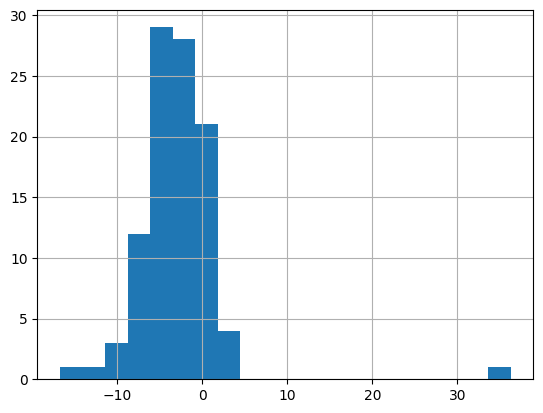

In [25]:
sample_data = repub_votes_potus_08_12
sample_data['diff'] = sample_data['repub_percent_08'] - sample_data['repub_percent_12']
import matplotlib.pyplot as plt
sample_data['diff'].hist(bins=20)

In [26]:
xbar_diff = sample_data['diff'].mean()
print(xbar_diff)

n_diff = len(sample_data)
print(n_diff)

## t = (xbar_diff - μdiff) / √(sdiff^2/ndiff)
s_diff = sample_data['diff'].std()
t_stat = (xbar_diff-0) / np.sqrt(s_diff**2/n_diff)
print(t_stat)

degrees_of_freedom = n_diff - 1
print(degrees_of_freedom)

from scipy.stats import t
p_value = t.cdf(t_stat, df=n_diff-1)
print(p_value)

-2.877109041242944
100
-5.601043121928489
99
9.572537285272411e-08


In [27]:
# import sys
# print(sys.executable)

In [28]:
### !python -m pip install pingouin

In [29]:
import pingouin
pingouin.ttest(x=sample_data['diff'],
                y=0,
                alternative="less")

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.560104,1.323e+05,1.0


In [30]:
pingouin.ttest(x=sample_data['repub_percent_08'],
                y=sample_data['repub_percent_12'],
                paired=True,
                alternative="less")

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.217364,1.323e+05,0.696338


In [31]:
pingouin.ttest(x=sample_data['repub_percent_08'],
                y=sample_data['repub_percent_12'],
                paired=False, # The default
                alternative="less")

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.536997,198,less,0.062945,"[-inf, 0.22]",0.217364,0.927,0.454972


Visualizing the difference
Before you start running hypothesis tests, it's a great idea to perform some exploratory data analysis; that is, calculating summary statistics and visualizing distributions.

Here, you'll look at the proportion of county-level votes for the Democratic candidate in 2012 and 2016, sample_dem_data. Since the counties are the same in both years, these samples are paired. The columns containing the samples are dem_percent_12 and dem_percent_16.

dem_votes_potus_12_16 is available as sample_dem_data. pandas and matplotlib.pyplot are loaded with their usual aliases.

In [32]:
sample_dem_data = dem_votes_potus_12_16

# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']

# Print sample_dem_data
print(sample_dem_data)

       state       county  dem_percent_12  dem_percent_16       diff
0    Alabama      Bullock       76.305900       74.946921   1.358979
1    Alabama      Chilton       19.453671       15.847352   3.606319
2    Alabama         Clay       26.673672       18.674517   7.999155
3    Alabama      Cullman       14.661752       10.028252   4.633500
4    Alabama     Escambia       36.915731       31.020546   5.895185
..       ...          ...             ...             ...        ...
495  Wyoming        Uinta       19.065464       14.191263   4.874201
496  Wyoming     Washakie       20.131846       13.948610   6.183235
497   Alaska   District 3       33.514582       16.301064  17.213518
498   Alaska  District 18       61.284271       52.810051   8.474220
499   Alaska  District 24       42.913980       39.405286   3.508694

[500 rows x 5 columns]


6.829312660106834
5.040139140132317


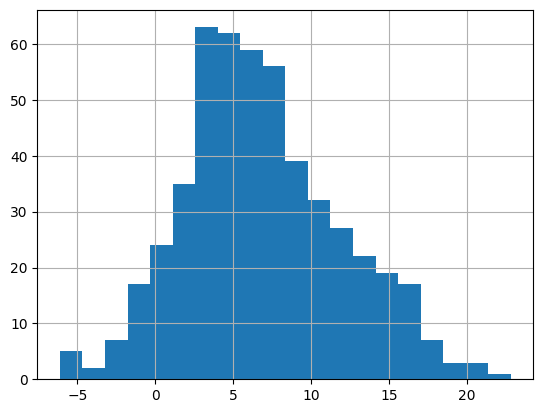

In [33]:
# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']

# Find the mean of the diff column
xbar_diff = sample_dem_data['diff'].mean()

# Print xbar_diff
print(xbar_diff)

# Find the standard deviation of the diff column
s_diff = sample_dem_data['diff'].std()

# Print s_diff
print(s_diff)

# Plot a histogram of diff with 20 bins
sample_dem_data['diff'].hist(bins=20)
plt.show()

Using ttest()
Manually calculating test statistics and transforming them with a CDF to get a p-value is a lot of effort to compare two sample means. The comparison of two sample means is called a t-test, and the pingouin Python package has a .ttest() method to accomplish it. This method provides some flexibility in how you perform the test.

As in the previous exercise, you'll explore the difference between the proportion of county-level votes for the Democratic candidate in 2012 and 2016 to identify if the difference is significant. The hypotheses are as follows:

Ho: The proportion of democratic votes in 2012 and 2016 were the same. 
Ha: The proportion of democratic votes in 2012 and 2016 were different.

sample_dem_data is available and has the columns diff, dem_percent_12, and dem_percent_16 in addition to the state and county names. pingouin and has been loaded along with pandas as pd.

In [34]:
# Conduct a t-test on diff
test_results = pingouin.ttest(x=sample_dem_data['diff'],
                y=0,
                alternative="two-sided")


                              
# Print the test results
print(test_results)

# Reject the null hypothesis.

                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  1.354985   

              BF10  power  
T-test  2.246e+111    1.0  


In [35]:

# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(x=sample_dem_data['dem_percent_12'],
                                    y=sample_dem_data['dem_percent_16'],
                                    paired=True,
                                    alternative="two-sided")
                              
# Print the paired test results
print(paired_test_results)

                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  0.454202   

              BF10  power  
T-test  2.246e+111    1.0  


In [36]:
#unpaired
pingouin.ttest(x=sample_dem_data['dem_percent_12'], 
               y=sample_dem_data['dem_percent_16'], 
               alternative="two-sided")

#Paired t-test party! Using .ttest() lets you avoid manual calculation to run your test. 
# When you have paired data, a paired t-test is preferable to the unpaired version 
# because it reduces the chance of a false negative error.

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,7.181565,998,two-sided,1.345737e-12,"[4.96, 8.7]",0.454202,4.308e+09,1.0


#### **ANOVA tests**

1. Job satisfaction: 5 categories
stack_overflow['job_sat'].value_counts()

2. Visualizing multiple distributions
Is mean annual compensation different for
different levels of job satisfaction?
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="converted_comp",
            y="job_sat",
            data=stack_overflow)
plt.show()

3. Analysis of variance (ANOVA)

A test for differences between groups
alpha = 0.2
pingouin.anova(data=stack_overflow,
dv="converted_comp",
between="job_sat")
Source ddof1 ddof2 F p-unc np2
0 job_sat 4 2256 4.480485 0.001315 0.007882
0.001315 < α
At least two categories have significantly different compensation

4. Pairwise tests

μ very dissatisfied ≠ μ slightly dissatisfied
μ very dissatisfied ≠ μ neither
μ very dissatisfied ≠ μ slightly satisfied
μ very dissatisfied ≠ μ very satisfied
μ slightly dissatisfied ≠ μ neither
μ slightly dissatisfied ≠ μ slightly satisfied
μ slightly dissatisfied ≠ μ very satisfied
μ neither ≠ μ slightly satisfied
μ neither ≠ μ very satisfied
μ slightly satisfied ≠ μ very satisfied

Set significance level to α = 0.2

5. pairwise_tests()

pingouin.pairwise_tests(data=stack_overflow,
                        dv="converted_comp",
                        between="job_sat",
                        padjust="none")
 
6. As the number of groups increases...

there is more prob of a false positive

7. Bonferroni correction

pingouin.pairwise_tests(data=stack_overflow,
                        dv="converted_comp",
                        between="job_sat",
                        padjust="bonf")
 
8. More methods

padjust : string
Method used for testing and adjustment of pvalues.
'none' : no correction [default]
'bonf' : one-step Bonferroni correction
'sidak' : one-step Sidak correction
'holm' : step-down method using Bonferroni adjustments
'fdr_bh' : Benjamini/Hochberg FDR correction
'fdr_by' : Benjamini/Yekutieli FDR correction

job_sat
Very satisfied           879
Slightly satisfied       680
Slightly dissatisfied    342
Neither                  201
Very dissatisfied        159
Name: count, dtype: int64

C:\Users\mcaba\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


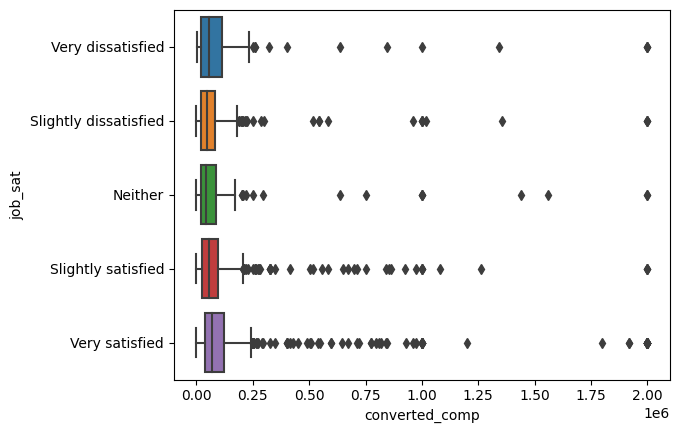

In [37]:
display(
stack_overflow['job_sat'].value_counts()
)

import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="converted_comp",
            y="job_sat",
            data=stack_overflow)
plt.show()

In [38]:
alpha = 0.2
pingouin.anova(data=stack_overflow,
                dv="converted_comp",
                between="job_sat")

,Source,ddof1,ddof2,F,p-unc,np2
0,job_sat,4,2256,4.480485,0.001315,0.007882


In [39]:
pingouin.pairwise_tests(data=stack_overflow,
                        dv="converted_comp",
                        between="job_sat",
                        padjust="none")

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,0.197,0.119131
1,job_sat,Very dissatisfied,Neither,False,True,0.545948,321.165726,two-sided,0.585481,0.135,0.058537
2,job_sat,Very dissatisfied,Slightly satisfied,False,True,1.243665,187.153329,two-sided,0.215179,0.208,0.145624
3,job_sat,Very dissatisfied,Very satisfied,False,True,-0.747379,221.666205,two-sided,0.455627,0.126,-0.063479
4,job_sat,Slightly dissatisfied,Neither,False,True,-0.602209,367.730081,two-sided,0.547406,0.118,-0.055707
5,job_sat,Slightly dissatisfied,Slightly satisfied,False,True,0.038264,569.926329,two-sided,0.969491,0.074,0.002719
6,job_sat,Slightly dissatisfied,Very satisfied,False,True,-3.076222,821.303063,two-sided,0.002166,7.43,-0.173247
7,job_sat,Neither,Slightly satisfied,False,True,0.700752,258.204546,two-sided,0.484088,0.114,0.068513
8,job_sat,Neither,Very satisfied,False,True,-1.662901,328.326639,two-sided,0.097286,0.337,-0.120115
9,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,158.564,-0.192931


In [40]:
pingouin.pairwise_tests(data=stack_overflow,
                        dv="converted_comp",
                        between="job_sat",
                        padjust="bonf")

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,1.000000,bonf,0.197,0.119131
1,job_sat,Very dissatisfied,Neither,False,True,0.545948,321.165726,two-sided,0.585481,1.000000,bonf,0.135,0.058537
2,job_sat,Very dissatisfied,Slightly satisfied,False,True,1.243665,187.153329,two-sided,0.215179,1.000000,bonf,0.208,0.145624
3,job_sat,Very dissatisfied,Very satisfied,False,True,-0.747379,221.666205,two-sided,0.455627,1.000000,bonf,0.126,-0.063479
4,job_sat,Slightly dissatisfied,Neither,False,True,-0.602209,367.730081,two-sided,0.547406,1.000000,bonf,0.118,-0.055707
5,job_sat,Slightly dissatisfied,Slightly satisfied,False,True,0.038264,569.926329,two-sided,0.969491,1.000000,bonf,0.074,0.002719
6,job_sat,Slightly dissatisfied,Very satisfied,False,True,-3.076222,821.303063,two-sided,0.002166,0.021659,bonf,7.43,-0.173247
7,job_sat,Neither,Slightly satisfied,False,True,0.700752,258.204546,two-sided,0.484088,1.000000,bonf,0.114,0.068513
8,job_sat,Neither,Very satisfied,False,True,-1.662901,328.326639,two-sided,0.097286,0.972864,bonf,0.337,-0.120115
9,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,0.000638,bonf,158.564,-0.192931


Visualizing many categories
So far in this chapter, we've only considered the case of differences in a numeric variable between two categories. Of course, many datasets contain more categories. Before you get to conducting tests on many categories, it's often helpful to perform exploratory data analysis (EDA), calculating summary statistics for each group and visualizing the distributions of the numeric variable for each category using box plots.

Here, we'll return to the late shipments data, and how the price of each package (pack_price) varies between the three shipment modes (shipment_mode): "Air", "Air Charter", and "Ocean".

late_shipments is available; pandas and matplotlib.pyplot are loaded with their standard aliases, and seaborn is loaded as sns.

shipment_mode
Air            39.712395
Air Charter     4.226667
Ocean           6.432273
Name: pack_price, dtype: float64
shipment_mode
Air            48.932861
Air Charter     0.992969
Ocean           5.303047
Name: pack_price, dtype: float64


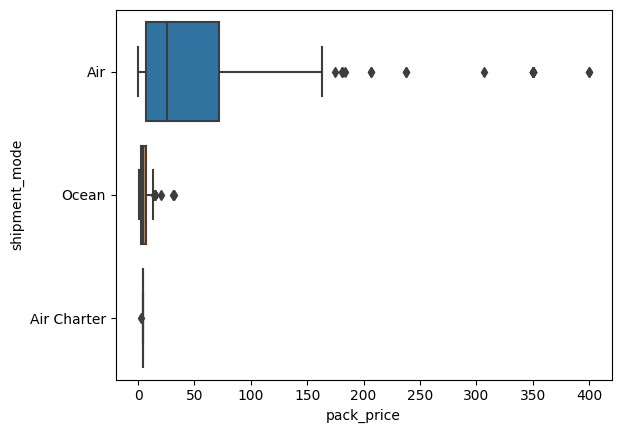

In [41]:
xbar_pack_by_mode = late_shipments.groupby('shipment_mode')['pack_price'].mean()

# Print the grouped means
print(xbar_pack_by_mode)

# Calculate the standard deviation of the pack_price for each shipment_mode
s_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].std()

# Print the grouped standard deviations
print(s_pack_by_mode)

# Boxplot of shipment_mode vs. pack_price
sns.boxplot(x="pack_price",
            y="shipment_mode",
            data=late_shipments)
plt.show()

Conducting an ANOVA test
The box plots made it look like the distribution of pack price was different for each of the three shipment modes. However, it didn't tell us whether the mean pack price was different in each category. To determine that, we can use an ANOVA test. The null and alternative hypotheses can be written as follows.

H0 : Pack prices for every category of shipment mode are the same.

Ha: Pack prices for some categories of shipment mode are different.

Use a significance level of 0.1.

late_shipments is available and pingouin has been loaded.

In [42]:
# Run an ANOVA for pack_price across shipment_mode
anova_results = pingouin.anova(data=late_shipments,
                dv="pack_price",
                between="shipment_mode")



# Print anova_results
print(anova_results)

# Yes. The p-value is less than or equal to the significance level, 
# so the null hypothesis should be rejected.

          Source  ddof1  ddof2        F         p-unc       np2
0  shipment_mode      2    997  21.8646  5.089479e-10  0.042018


Pairwise t-tests
The ANOVA test didn't tell you which categories of shipment mode had significant differences in pack prices. To pinpoint which categories had differences, you could instead use pairwise t-tests.

late_shipments is available and pingouin has been loaded.

In [43]:
# Perform a pairwise t-test on pack price, grouped by shipment mode
pairwise_results = pingouin.pairwise_tests(data=late_shipments,
                        dv="pack_price",
                        between="shipment_mode",
                        padjust="none") 




# Print pairwise_results
print(pairwise_results)

        Contrast            A            B  Paired  Parametric          T  \
0  shipment_mode          Air  Air Charter   False        True  21.179625   
1  shipment_mode          Air        Ocean   False        True  19.335760   
2  shipment_mode  Air Charter        Ocean   False        True  -3.170654   

          dof alternative         p-unc       BF10    hedges  
0  600.685682   two-sided  8.748346e-75  5.809e+76  0.726592  
1  986.979785   two-sided  6.934555e-71  1.129e+67  0.711119  
2   35.615026   two-sided  3.123012e-03     15.277 -0.423775  


In [44]:
# Modify the pairwise t-tests to use Bonferroni p-value adjustment
pairwise_results = pingouin.pairwise_tests(data=late_shipments, 
                                           dv="pack_price",
                                           between="shipment_mode",
                                           padjust="bonf")

# Print pairwise_results
print(pairwise_results)

        Contrast            A            B  Paired  Parametric          T  \
0  shipment_mode          Air  Air Charter   False        True  21.179625   
1  shipment_mode          Air        Ocean   False        True  19.335760   
2  shipment_mode  Air Charter        Ocean   False        True  -3.170654   

          dof alternative         p-unc        p-corr p-adjust       BF10  \
0  600.685682   two-sided  8.748346e-75  2.624504e-74     bonf  5.809e+76   
1  986.979785   two-sided  6.934555e-71  2.080367e-70     bonf  1.129e+67   
2   35.615026   two-sided  3.123012e-03  9.369037e-03     bonf     15.277   

     hedges  
0  0.726592  
1  0.711119  
2 -0.423775  


## **Proportion Tests (Module 03-054)**

#### **One-sample proportion tests**

1. Chapter 1 recap

Is a claim about an unknown population proportion feasible?
1. Standard error of sample statistic from bootstrap distribution
2. Compute a standardized test statistic
3. Calculate a p-value
4. Decide which hypothesis made most sense
Now, calculate the test statistic without using the bootstrap distribution

2. Standardized test statistic for proportions

p: population proportion (unknown population parameter)
p^: sample proportion (sample statistic)
p0 : hypothesized population proportion

z = (p^ − mean(p^)) / SE(p^) = (p^ − p) / SE(p^)

Assuming H0 is true, p = p0 , so

z = (p^ − p0) / SE(p^)

3. Simplifying the standard error calculations

SE(p^) = √(p0*(1-p0)/n) → Under H0, SE(p^) depends on hypothesized p0 and sample size n

Assuming H0 is true,

z = (p^ − p0) / √(p0*(1-p0)/n)

- Only uses sample information ( and n) and the hypothesized parameter (p0)

4. Why z instead of t?

t = (xbar_child − xbar_adult) / √(schild^2/nchild) + (sadult^2/nadult)

s is calculated from xbar
xbar estimates the population mean
s estimates the population standard deviation
↑ uncertainty in our estimate of the parameter
t-distribution - fatter tails than a normal distribution
p^ only appears in the numerator, so z-scores are fine

5. Stack Overflow age categories

Ho : Proportion of Stack Overflow users under thirty = 0.5
Ha : Proportion of Stack Overflow users under thirty ≠ 0.5

alpha = 0.01
stack_overflow['age_cat'].value_counts(normalize=True)

6. Variables for z

p_hat = (stack_overflow['age_cat'] == 'Under 30').mean()
p_0 = 0.50
n = len(stack_overflow)

7. Calculating the z-score
z = (p^ − p0) / √(p0*(1-p0)/n)

import numpy as np
numerator = p_hat - p_0
denominator = np.sqrt(p_0 * (1 - p_0) / n)
z_score = numerator / denominator

8. Calculating the p-value

Left-tailed ("less than"):
from scipy.stats import norm
p_value = norm.cdf(z_score)

Right-tailed ("greater than"):
p_value = 1 - norm.cdf(z_score)

Two-tailed ("not equal"):
p_value = norm.cdf(-z_score) +
1 - norm.cdf(z_score)
p_value = 2 * (1 - norm.cdf(z_score))

0.0007094227368100725
p_value <= alpha
True

In [45]:
alpha = 0.01
stack_overflow['age_cat'].value_counts(normalize=True)

age_cat
Under 30       0.535604
At least 30    0.464396
Name: proportion, dtype: float64

In [54]:
p_hat = (stack_overflow['age_cat'] == 'Under 30').mean()
print(p_hat)

p_0 = 0.50
n = len(stack_overflow)
print(n)

0.5356037151702786
2261


In [56]:
import numpy as np
numerator = p_hat - p_0
denominator = np.sqrt(p_0 * (1 - p_0) / n)
z_score = numerator / denominator
print(z_score)


3.385911440783663


In [65]:
##Left-tailed ("less than"):
from scipy.stats import norm
p_value1 = norm.cdf(z_score)
print(p_value1)

#Right-tailed ("greater than"):
p_value2 = 1 - norm.cdf(z_score)
print(p_value2)

#Two-tailed ("not equal"):
p_value3 = norm.cdf(-z_score) + 1 - norm.cdf(z_score)
p_value4 = 2 * (1 - norm.cdf(z_score))
print(p_value3)
print(p_value4)


alpha = 0.01
val = p_value4 <= alpha
print(val)


0.999645288631595
0.00035471136840503625
0.0007094227368100725
0.0007094227368100725
True


Test for single proportions
In Chapter 1, you calculated a p-value for a test hypothesizing that the proportion of late shipments was greater than 6%. In that chapter, you used a bootstrap distribution to estimate the standard error of the statistic. An alternative is to use an equation for the standard error based on the sample proportion, hypothesized proportion, and sample size.

 z = (p^ − p0) / √(p0*(1-p0)/n)
 

You'll revisit the p-value using this simpler calculation.

late_shipments is available. pandas and numpy are available under their usual aliases, and norm is loaded from scipy.stats.

In [66]:
# Hypothesize that the proportion of late shipments is 6%
p_0 = 0.06

# Calculate the sample proportion of late shipments
p_hat = (late_shipments['late'] == "Yes").mean()

# Calculate the sample size
n = len(late_shipments)

# Print p_hat and n
print(p_hat, n)

0.061 1000


In [67]:
# Hypothesize that the proportion of late shipments is 6%
p_0 = 0.06

# Calculate the sample proportion of late shipments
p_hat = (late_shipments['late'] == "Yes").mean()

# Calculate the sample size
n = len(late_shipments)

# Calculate the numerator and denominator of the test statistic
numerator = p_hat - p_0
denominator = np.sqrt(p_0 * (1 - p_0) / n)

# Calculate the test statistic
z_score = numerator / denominator
print(z_score)

# Print the result
print(z_score)

0.13315591032282698
0.13315591032282698


In [68]:
# Hypothesize that the proportion of late shipments is 6%
p_0 = 0.06

# Calculate the sample proportion of late shipments
p_hat = (late_shipments['late'] == "Yes").mean()

# Calculate the sample size
n = len(late_shipments)

# Calculate the numerator and denominator of the test statistic
numerator = p_hat - p_0
denominator = np.sqrt(p_0 * (1 - p_0) / n)

# Calculate the test statistic
z_score = numerator / denominator

# Calculate the p-value from the z-score
p_value = 1 - norm.cdf(z_score)


# Print the p-value
print(p_value)

0.44703503936503364


#### **Two-sample proportion tests**

1. Comparing two proportions

H0 : Proportion of hobbyist users is the same for those under thirty as those at least thirty
H0 : p>=30 − p<30 = 0

Ha : Proportion of hobbyist users is different for those under thirty to those at least thirty
Ha : p>=30 − p<30 ≠ 0

alpha = 0.05

2. Calculating the z-score

z-score equation for a proportion test:
z = (p^≥30 − p^<30) - 0 / SE(p^≥30 − p^<30)

Standard error equation:
SE(p^≥30 − p^<30) = √(p^ × (1 − p^)/ n≥30)+(p^ × (1 − p^)/ n<30)

→ weighted mean of and
p^ = (n≥30 × p^≥30 + n<30 × p^<30) / (n≥30 + n<30)

Only require p^≥30, p^<30), n≥30 , n<30 from the sample to calculate the z-score

3. Getting the numbers for the z-score

p_hats = stack_overflow.groupby("age_cat")['hobbyist'].value_counts(normalize=True)
alpha = 0.05
p_hats = stack_overflow.groupby("age_cat")['hobbyist'].value_counts(normalize=True)
n = stack_overflow.groupby("age_cat")['hobbyist'].count()

p_hats = stack_overflow.groupby("age_cat")['hobbyist'].value_counts(normalize=True)
p_hat_at_least_30 = p_hats[("At least 30", "Yes")]
p_hat_under_30 = p_hats[("Under 30", "Yes")]
print(p_hat_at_least_30, p_hat_under_30)

n = stack_overflow.groupby("age_cat")['hobbyist'].count()
n_at_least_30 = n["At least 30"]
n_under_30 = n["Under 30"]
print(n_at_least_30, n_under_30)

p_hat = (n_at_least_30 * p_hat_at_least_30 + n_under_30 * p_hat_under_30) /
(n_at_least_30 + n_under_30)
std_error = np.sqrt(p_hat * (1-p_hat) / n_at_least_30 +
p_hat * (1-p_hat) / n_under_30)
z_score = (p_hat_at_least_30 - p_hat_under_30) / std_error
print(z_score)

4. Proportion tests using proportions_ztest()

stack_overflow.groupby("age_cat")['hobbyist'].value_counts()

n_hobbyists = np.array([812, 1021])
n_rows = np.array([812 + 238, 1021 + 190])
from statsmodels.stats.proportion import proportions_ztest
z_score, p_value = proportions_ztest(count=n_hobbyists, nobs=n_rows,
                                    alternative="two-sided")

In [70]:
alpha = 0.05
p_hats = stack_overflow.groupby("age_cat")['hobbyist'].value_counts(normalize=True)
n = stack_overflow.groupby("age_cat")['hobbyist'].count()

print(p_hats)
print(n)

age_cat      hobbyist
At least 30  Yes         0.773333
             No          0.226667
Under 30     Yes         0.843105
             No          0.156895
Name: proportion, dtype: float64
age_cat
At least 30    1050
Under 30       1211
Name: hobbyist, dtype: int64


In [72]:
p_hat_at_least_30 = p_hats[("At least 30", "Yes")]
p_hat_under_30 = p_hats[("Under 30", "Yes")]
print(p_hat_at_least_30, p_hat_under_30)

n_at_least_30 = n["At least 30"]
n_under_30 = n["Under 30"]
print(n_at_least_30, n_under_30)

0.7733333333333333 0.8431048720066061
1050 1211


In [110]:
p_hat = (n_at_least_30 * p_hat_at_least_30 + n_under_30 * p_hat_under_30) / (n_at_least_30 + n_under_30)
std_error = np.sqrt(p_hat * (1-p_hat) / n_at_least_30 + p_hat * (1-p_hat) / n_under_30)
z_score = (p_hat_at_least_30 - p_hat_under_30) / std_error
print(z_score)

-4.223691463320559


In [75]:
stack_overflow.groupby("age_cat")['hobbyist'].value_counts()

age_cat      hobbyist
At least 30  Yes          812
             No           238
Under 30     Yes         1021
             No           190
Name: count, dtype: int64

In [123]:
n_hobbyists = np.array([812, 1021])
n_rows = np.array([812 + 238, 1021 + 190])
from statsmodels.stats.proportion import proportions_ztest
z_score, p_value = proportions_ztest(count=n_hobbyists, nobs=n_rows,
                                    alternative="two-sided")

print(z_score, p_value )

-4.223691463320559 2.403330142685068e-05


Test of two proportions
You may wonder if the amount paid for freight affects whether or not the shipment was late. Recall that in the late_shipments dataset, whether or not the shipment was late is stored in the late column. Freight costs are stored in the freight_cost_group column, and the categories are "expensive" and "reasonable".

The hypotheses to test, with "late" corresponding to the proportion of late shipments for that group, are

H0: late_expensive - late_reasonable = 0

Ha: late_expensive - late_reasonable > 0

p_hats contains the estimates of population proportions (sample proportions) for each freight_cost_group:

freight_cost_group  late
expensive           Yes     0.082569
reasonable          Yes     0.035165
Name: late, dtype: float64
ns contains the sample sizes for these groups:

freight_cost_group
expensive     545
reasonable    455
Name: late, dtype: int64
pandas and numpy have been imported under their usual aliases, and norm is available from scipy.stats.

In [81]:
display(late_shipments.head(2))

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd,is_late
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,266644.0,89.0,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83,1
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,800.0,32.0,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72,0


In [111]:
# Calculate the pooled estimate of the population proportion
p_hatss = late_shipments.groupby("freight_cost_groups")['late'].value_counts(normalize=True)

# Print the result
print(p_hatss)

ns = late_shipments.groupby("freight_cost_groups")['late'].count()
print(ns)

freight_cost_groups  late
expensive            No      0.920904
                     Yes     0.079096
reasonable           No      0.964835
                     Yes     0.035165
Name: proportion, dtype: float64
freight_cost_groups
expensive     531
reasonable    455
Name: late, dtype: int64


In [106]:
p_hat_expensive = p_hatss[("expensive", "Yes")]
p_hat_reasonable = p_hatss[("reasonable", "Yes")]
print(p_hat_expensive, p_hat_reasonable)

n_expensive = ns["expensive"]
n_reasonable = ns["reasonable"]
print(n_expensive, n_reasonable)

0.07909604519774012 0.035164835164835165
531 455


In [108]:
p_hat = (n_expensive * p_hat_expensive + n_reasonable * p_hat_reasonable) / (n_expensive + n_reasonable)
print(p_hat)

p_hat_2 = (ns["expensive"] * p_hatss[("expensive", "Yes")] + ns["reasonable"] * p_hatss[("reasonable", "Yes")]) / (ns["expensive"] + ns["reasonable"])
print(p_hat_2)

0.058823529411764705
0.058823529411764705


In [113]:
# Calculate the pooled estimate of the population proportion
p_hat = (n_expensive * p_hat_expensive + n_reasonable * p_hat_reasonable) / (n_expensive + n_reasonable)

# Calculate p_hat one minus p_hat
p_hat_times_not_p_hat = p_hat * (1-p_hat)

# Divide this by each of the sample sizes and then sum
p_hat_times_not_p_hat_over_ns = p_hat_times_not_p_hat/ns["expensive"] +  p_hat_times_not_p_hat/ns["reasonable"]

# Calculate the standard error
std_error = np.sqrt(p_hat_times_not_p_hat_over_ns)

# Print the result
print(std_error)

0.015031300895066685


In [117]:
# Calculate the pooled estimate of the population proportion
p_hat = (n_expensive * p_hat_expensive + n_reasonable * p_hat_reasonable) / (n_expensive + n_reasonable)

# Calculate p_hat one minus p_hat
p_hat_times_not_p_hat = p_hat * (1 - p_hat)

# Divide this by each of the sample sizes and then sum
p_hat_times_not_p_hat_over_ns = p_hat_times_not_p_hat / ns["expensive"] + p_hat_times_not_p_hat / ns["reasonable"]

# Calculate the standard error
std_error = np.sqrt(p_hat_times_not_p_hat_over_ns)

# Calculate the z-score
z_score = (p_hat_expensive - p_hat_reasonable) / std_error

# Print z_score
print(z_score)

2.922648567784529


In [119]:
# Calculate p_hat one minus p_hat
p_hat_times_not_p_hat = p_hat * (1 - p_hat)

# Divide this by each of the sample sizes and then sum
p_hat_times_not_p_hat_over_ns = p_hat_times_not_p_hat / ns["expensive"] + p_hat_times_not_p_hat / ns["reasonable"]

# Calculate the standard error
std_error = np.sqrt(p_hat_times_not_p_hat_over_ns)

# Calculate the z-score
z_score = (p_hat_expensive - p_hat_reasonable) / std_error

# Calculate the p-value from the z-score
p_value = 1 - norm.cdf(z_score)

# Print p_value
print(p_value)

0.0017353400023595311


proportions_ztest() for two samples
That took a lot of effort to calculate the p-value, so while it is useful to see how the calculations work, it isn't practical to do in real-world analyses. For daily usage, it's better to use the statsmodels package.

Recall the hypotheses.

H0: late_expensive - late_reasonable = 0

Ha: late_expensive - late_reasonable > 0


late_shipments is available, containing the freight_cost_group column. numpy and pandas have been loaded under their standard aliases, and proportions_ztest has been loaded from statsmodels.stats.proportion.

In [120]:
from statsmodels.stats.proportion import proportions_ztest

In [122]:
# Count the late column values for each freight_cost_group
late_by_freight_cost_group = late_shipments.groupby("freight_cost_groups")['late'].value_counts()

# Print the counts
print(late_by_freight_cost_group)

freight_cost_groups  late
expensive            No      489
                     Yes      42
reasonable           No      439
                     Yes      16
Name: count, dtype: int64


In [127]:
# Count the late column values for each freight_cost_group
late_by_freight_cost_group = late_shipments.groupby("freight_cost_groups")['late'].value_counts()

# Create an array of the "Yes" counts for each freight_cost_group
success_counts = np.array([45, 16])

# Create an array of the total number of rows in each freight_cost_group
n = np.array([500 + 45, 439 + 16])

# Run a z-test on the two proportions
stat, p_value =  proportions_ztest(count=success_counts, nobs=n,
                                    alternative="larger")


# Print the results
print(stat, p_value)

3.1190401865206128 0.0009072060637051224


#### **Chi-square test of independence**

1. Revisiting the proportion test

age_by_hobbyist = stack_overflow.groupby("age_cat")['hobbyist'].value_counts()
print(age_by_hobbyist)

from statsmodels.stats.proportion import proportions_ztest
n_hobbyists = np.array([812, 1021])
n_rows = np.array([812 + 238, 1021 + 190])
stat, p_value = proportions_ztest(count=n_hobbyists, nobs=n_rows,
                                    alternative="two-sided")
print(stat, p_value)

2. Independence of variables
Previous hypothesis test result: evidence that hobbyist and age_cat are associated
    Statistical independence - proportion of successes in the response variable is the same
    across all categories of the explanatory variable

3. Test for independence of variables
import pingouin
expected, observed, stats = pingouin.chi2_independence(data=stack_overflow, x='hobbyist',
                                                        y='age_cat', correction=False)
print(stats)

statistic = 17.839570 = (−4.223691463320559) 2 2 = (z-score)2

4. Job satisfaction and age category

stack_overflow['age_cat'].value_counts()
stack_overflow['job_sat'].value_counts()

5. Declaring the hypotheses

H0 : Age categories are independent of job satisfaction levels
Ha : Age categories are not independent of job satisfaction levels
alpha = 0.1
Test statistic denoted χ2
Assuming independence, how far away are the observed results from the expected values?

6. Exploratory visualization: proportional stacked bar plot

props = stack_overflow.groupby('job_sat')['age_cat'].value_counts(normalize=True)
wide_props = props.unstack()
wide_props.plot(kind="bar", stacked=True)

7. Chi-square independence test

import pingouin
expected, observed, stats = pingouin.chi2_independence(data=stack_overflow, x="job_sat", y="age_cat")
print(stats)

Degrees of freedom:
(No. of response categories − 1) × (No. of explanatory categories − 1)
(2 − 1) ∗ (5 − 1) = 4

8. Swapping the variables? chi-square both ways

props = stack_overflow.groupby('age_cat')['job_sat'].value_counts(normalize=True)
wide_props = props.unstack()
wide_props.plot(kind="bar", stacked=True)

expected, observed, stats = pingouin.chi2_independence(data=stack_overflow, x="age_cat", y="job_sat")
print(stats[stats['test'] == 'pearson'])

Ask: Are the variables X and Y independent?
Not: Is variable X independent from variable Y?

9. What about direction and tails?
Observed and expected counts squared must be non-negative
chi-square tests are almost always right-tailed
Left-tailed chi-square tests are used in statistical forensics to detect if a fit is suspiciously good because the data was fabricated. Chi-square tests of variance can be two-tailed. These are niche uses, though.

In [128]:
age_by_hobbyist = stack_overflow.groupby("age_cat")['hobbyist'].value_counts()
print(age_by_hobbyist)

from statsmodels.stats.proportion import proportions_ztest
n_hobbyists = np.array([812, 1021])
n_rows = np.array([812 + 238, 1021 + 190])
stat, p_value = proportions_ztest(count=n_hobbyists, nobs=n_rows,
                                    alternative="two-sided")
print(stat, p_value)

age_cat      hobbyist
At least 30  Yes          812
             No           238
Under 30     Yes         1021
             No           190
Name: count, dtype: int64
-4.223691463320559 2.403330142685068e-05


In [129]:
import pingouin
expected, observed, stats = pingouin.chi2_independence(data=stack_overflow, x='hobbyist',
                                                        y='age_cat', correction=False)
print(stats)

                 test    lambda       chi2  dof      pval    cramer     power
0             pearson  1.000000  17.839570  1.0  0.000024  0.088826  0.988205
1        cressie-read  0.666667  17.818114  1.0  0.000024  0.088773  0.988126
2      log-likelihood  0.000000  17.802653  1.0  0.000025  0.088734  0.988069
3       freeman-tukey -0.500000  17.815060  1.0  0.000024  0.088765  0.988115
4  mod-log-likelihood -1.000000  17.848099  1.0  0.000024  0.088848  0.988236
5              neyman -2.000000  17.976656  1.0  0.000022  0.089167  0.988694


age_cat
Under 30       1211
At least 30    1050
Name: count, dtype: int64
job_sat
Very satisfied           879
Slightly satisfied       680
Slightly dissatisfied    342
Neither                  201
Very dissatisfied        159
Name: count, dtype: int64


C:\Users\mcaba\AppData\Local\Temp\ipykernel_39816\516579468.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  props = stack_overflow.groupby('job_sat')['age_cat'].value_counts(normalize=True)


<AxesSubplot: xlabel='job_sat'>

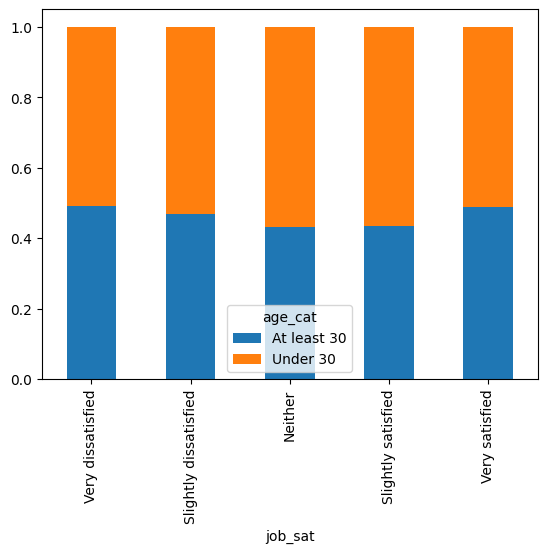

In [133]:
a = stack_overflow['age_cat'].value_counts()
print(a)

b = stack_overflow['job_sat'].value_counts()
print(b)

alpha = 0.1

props = stack_overflow.groupby('job_sat')['age_cat'].value_counts(normalize=True)
wide_props = props.unstack()
wide_props.plot(kind="bar", stacked=True)

In [134]:
import pingouin
expected, observed, stats = pingouin.chi2_independence(data=stack_overflow, x="job_sat", y="age_cat")
print(stats)

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  5.552373  4.0  0.235164  0.049555  0.437417
1        cressie-read  0.666667  5.554106  4.0  0.235014  0.049563  0.437545
2      log-likelihood  0.000000  5.558529  4.0  0.234632  0.049583  0.437871
3       freeman-tukey -0.500000  5.562688  4.0  0.234274  0.049601  0.438178
4  mod-log-likelihood -1.000000  5.567570  4.0  0.233854  0.049623  0.438538
5              neyman -2.000000  5.579519  4.0  0.232828  0.049676  0.439419


      test  lambda      chi2  dof      pval    cramer     power
0  pearson     1.0  5.552373  4.0  0.235164  0.049555  0.437417


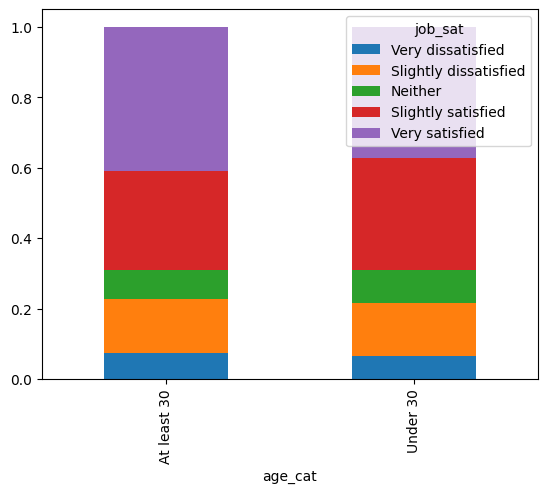

In [136]:
props = stack_overflow.groupby('age_cat')['job_sat'].value_counts(normalize=True)
wide_props = props.unstack()
wide_props.plot(kind="bar", stacked=True)

expected, observed, stats = pingouin.chi2_independence(data=stack_overflow, x="age_cat", y="job_sat")
print(stats[stats['test'] == 'pearson'])

Performing a chi-square test
The chi-square independence test compares proportions of successes of one categorical variable across the categories of another categorical variable.

Trade deals often use a form of business shorthand in order to specify the exact details of their contract. These are International Chamber of Commerce (ICC) international commercial terms, or incoterms for short.

The late_shipments dataset includes a vendor_inco_term that describes the incoterms that applied to a given shipment. The choices are:

EXW: "Ex works". The buyer pays for transportation of the goods.
CIP: "Carriage and insurance paid to". The seller pays for freight and insurance until the goods board a ship.
DDP: "Delivered duty paid". The seller pays for transportation of the goods until they reach a destination port.
FCA: "Free carrier". The seller pays for transportation of the goods.
Perhaps the incoterms affect whether or not the freight costs are expensive. Test these hypotheses with a significance level of 0.01.

H0 : vendor_inco_term and freight_cost_group are independent.

Ha : vendor_inco_term and freight_cost_group are associated.

In [138]:
# Proportion of freight_cost_group grouped by vendor_inco_term
props = late_shipments.groupby('vendor_inco_term')['freight_cost_groups'].value_counts(normalize=True)

# Print props
print(props)

vendor_inco_term  freight_cost_groups
CIP               reasonable             0.680000
                  expensive              0.320000
DDP               expensive              0.550000
                  reasonable             0.450000
DDU               reasonable             1.000000
EXW               expensive              0.583448
                  reasonable             0.416552
FCA               reasonable             0.663636
                  expensive              0.336364
Name: proportion, dtype: float64


In [140]:
# Proportion of freight_cost_group grouped by vendor_inco_term
props = late_shipments.groupby('vendor_inco_term')['freight_cost_groups'].value_counts(normalize=True)

# Convert props to wide format
wide_props = props.unstack()

# Print wide_props
print(wide_props)

freight_cost_groups  expensive  reasonable
vendor_inco_term                          
CIP                   0.320000    0.680000
DDP                   0.550000    0.450000
DDU                        NaN    1.000000
EXW                   0.583448    0.416552
FCA                   0.336364    0.663636


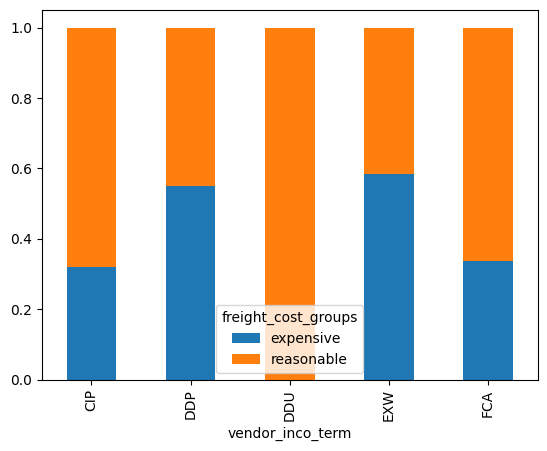

In [142]:
# Proportion of freight_cost_group grouped by vendor_inco_term
props = late_shipments.groupby('vendor_inco_term')['freight_cost_groups'].value_counts(normalize=True)

# Convert props to wide format
wide_props = props.unstack()

# Proportional stacked bar plot of freight_cost_group vs. vendor_inco_term
wide_props.plot(kind="bar", stacked=True)
plt.show()

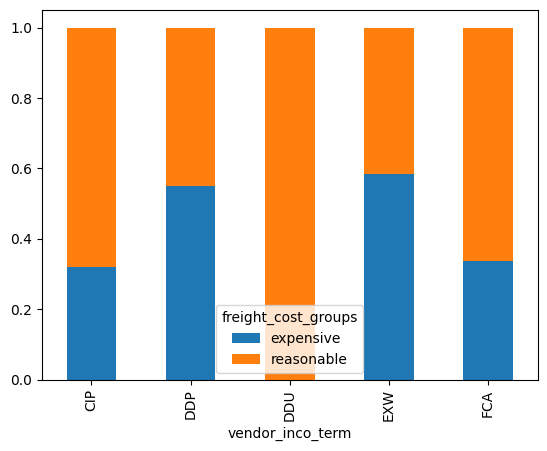

      test  lambda       chi2  dof          pval    cramer     power
0  pearson     1.0  34.805072  4.0  5.093922e-07  0.186561  0.999235


C:\Users\mcaba\AppData\Roaming\Python\Python310\site-packages\pingouin\contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
C:\Users\mcaba\AppData\Roaming\Python\Python310\site-packages\pingouin\contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
C:\Users\mcaba\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_stats_py.py:7175: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
C:\Users\mcaba\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_stats_py.py:7175: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
C:\Users\mcaba\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_stats_py.py:7172: RuntimeWarning: divide by zero encountered in divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)


In [145]:
# Proportion of freight_cost_group grouped by vendor_inco_term
props = late_shipments.groupby('vendor_inco_term')['freight_cost_groups'].value_counts(normalize=True)

# Convert props to wide format
wide_props = props.unstack()

# Proportional stacked bar plot of freight_cost_group vs. vendor_inco_term
wide_props.plot(kind="bar", stacked=True)
plt.show()

# Determine if freight_cost_group and vendor_inco_term are independent
expected, observed, stats = pingouin.chi2_independence(data=late_shipments, x="freight_cost_groups", y="vendor_inco_term")

# Print results
print(stats[stats['test'] == 'pearson']) 

Reject the null hypothesis and conclude that vendor_inco_term and freight_cost_group are associated.

Independence insight! The test to compare proportions of successes in a categorical variable across groups of another categorical variable is called a chi-square test of independence.

#### **Chi-square goodness of fit tests**

1. Purple links

How do you feel when you discover that you've already visited the top resource?
purple_link_counts = stack_overflow['purple_link'].value_counts()
purple_link_counts = purple_link_counts.rename_axis('purple_link')\
.reset_index(name='n')\
.sort_values('purple_link')

2. Declaring the hypotheses

hypothesized = pd.DataFrame({
'purple_link': ['Amused', 'Annoyed', 'Hello, old friend', 'Indifferent'],
'prop': [1/6, 1/6, 1/2, 1/6]})

H0 : The sample matches the hypothesized
distribution
Ha : The sample does not match the
hypothesized distribution

χ measures how far observed results are
from expectations in each group
alpha = 0.01

3. Hypothesized counts by category

n_total = len(stack_overflow)
hypothesized["n"] = hypothesized["prop"] * n_total

4. Visualizing counts

import matplotlib.pyplot as plt
plt.bar(purple_link_counts['purple_link'], purple_link_counts['n'],
color='red', label='Observed')
plt.bar(hypothesized['purple_link'], hypothesized['n'], alpha=0.5,
color='blue', label='Hypothesized')
plt.legend()
plt.show()

5. chi-square goodness of fit test

print(hypothesized)

from scipy.stats import chisquare
chisquare(f_obs=purple_link_counts['n'], f_exp=hypothesized['n'])

In [ ]:
purple_link_counts = stack_overflow['purple_link'].value_counts()
purple_link_counts = purple_link_counts.rename_axis('purple_link')\
                                        .reset_index(name='n')\
                                        .sort_values('purple_link')

print(purple_link_counts)

         purple_link     n
2             Amused   368
3            Annoyed   263
0  Hello, old friend  1225
1        Indifferent   405


In [150]:
hypothesized = pd.DataFrame({
'purple_link': ['Amused', 'Annoyed', 'Hello, old friend', 'Indifferent'],
'prop': [1/6, 1/6, 1/2, 1/6]})

alpha = 0.01
print(hypothesized)

         purple_link      prop
0             Amused  0.166667
1            Annoyed  0.166667
2  Hello, old friend  0.500000
3        Indifferent  0.166667


In [ ]:
n_total = len(stack_overflow)
hypothesized["n"] = hypothesized["prop"] * n_total
print(hypothesized)

         purple_link      prop            n
0             Amused  0.166667   376.833333
1            Annoyed  0.166667   376.833333
2  Hello, old friend  0.500000  1130.500000
3        Indifferent  0.166667   376.833333


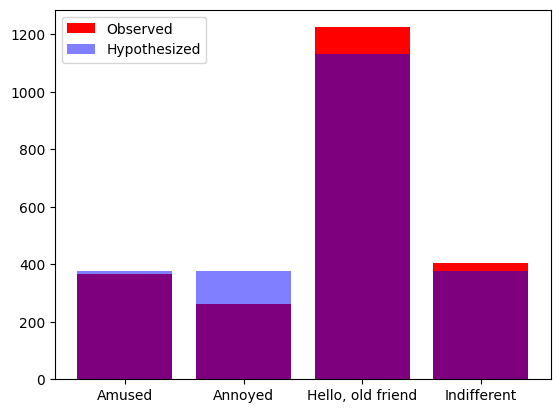

In [153]:
import matplotlib.pyplot as plt
plt.bar(purple_link_counts['purple_link'], purple_link_counts['n'],
color='red', label='Observed')
plt.bar(hypothesized['purple_link'], hypothesized['n'], alpha=0.5,
color='blue', label='Hypothesized')
plt.legend()
plt.show()

In [154]:
from scipy.stats import chisquare
chisquare(f_obs=purple_link_counts['n'], f_exp=hypothesized['n'])


Power_divergenceResult(statistic=44.59840778416629, pvalue=1.1261810719413759e-09)

Visualizing goodness of fit
The chi-square goodness of fit test compares proportions of each level of a categorical variable to hypothesized values. Before running such a test, it can be helpful to visually compare the distribution in the sample to the hypothesized distribution.

Recall the vendor incoterms in the late_shipments dataset. You hypothesize that the four values occur with these frequencies in the population of shipments.

CIP: 0.05
DDP: 0.1
EXW: 0.75
FCA: 0.1
These frequencies are stored in the hypothesized DataFrame.

The incoterm_counts DataFrame stores the .value_counts() of the vendor_inco_term column.

late_shipments is available; pandas and matplotlib.pyplot are loaded with their standard aliases.

In [163]:
incoterm_counts = late_shipments['vendor_inco_term'].value_counts()
incoterm_counts = incoterm_counts.rename_axis('vendor_inco_term')\
                                        .reset_index(name='n')\
                                        .sort_values('vendor_inco_term')

print(incoterm_counts)

  vendor_inco_term    n
3              CIP   56
2              DDP  100
4              DDU    1
0              EXW  732
1              FCA  111


In [164]:
hypothesized = pd.DataFrame({
'vendor_inco_term': ['CIP', 'DDP', 'DDU', 'EXW', 'FCA'],
'prop': [0.05, 0.1, 0, 0.75, 0.1]})

print(hypothesized)

  vendor_inco_term  prop
0              CIP  0.05
1              DDP  0.10
2              DDU  0.00
3              EXW  0.75
4              FCA  0.10


In [165]:
# Find the number of rows in late_shipments
n_total = len(late_shipments)

# Print n_total
print(n_total)

# Find the number of rows in late_shipments
n_total = len(late_shipments)

# Create n column that is prop column * n_total
hypothesized["n"] = hypothesized["prop"] * n_total

# Print the modified hypothesized DataFrame
print(hypothesized)

1000
  vendor_inco_term  prop      n
0              CIP  0.05   50.0
1              DDP  0.10  100.0
2              DDU  0.00    0.0
3              EXW  0.75  750.0
4              FCA  0.10  100.0


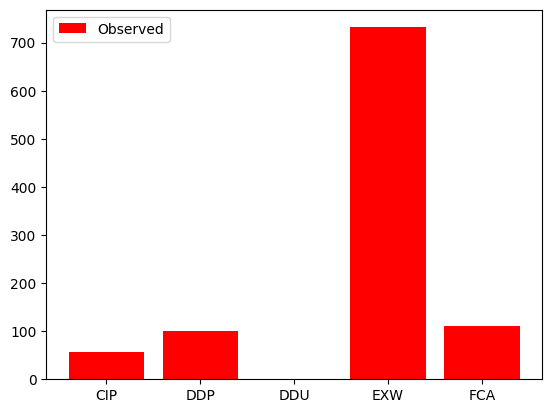

In [166]:
# Find the number of rows in late_shipments
n_total = len(late_shipments)

# Create n column that is prop column * n_total
hypothesized["n"] = hypothesized["prop"] * n_total

# Plot a red bar graph of n vs. vendor_inco_term for incoterm_counts
plt.bar(incoterm_counts['vendor_inco_term'], incoterm_counts['n'], 
color='red',
label="Observed")
plt.legend()
plt.show()

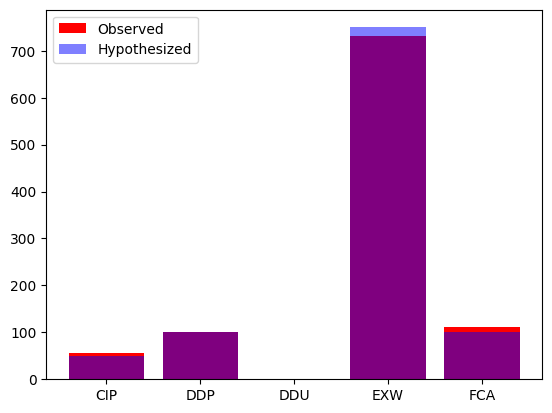

In [167]:
# Find the number of rows in late_shipments
n_total = len(late_shipments)

# Create n column that is prop column * n_total
hypothesized["n"] = hypothesized["prop"] * n_total

# Plot a red bar graph of n vs. vendor_inco_term for incoterm_counts
plt.bar(incoterm_counts['vendor_inco_term'], incoterm_counts['n'], color="red", label="Observed")

# Add a blue bar plot for the hypothesized counts
plt.bar(hypothesized['vendor_inco_term'], hypothesized['n'], alpha=0.5,
color='blue',label="Hypothesized")
plt.legend()
plt.show()

Performing a goodness of fit test
The bar plot of vendor_inco_term suggests that the distribution across the four categories was quite close to the hypothesized distribution. You'll need to perform a chi-square goodness of fit test to see whether the differences are statistically significant.

Recall the hypotheses for this type of test:

H0: The sample matches with the hypothesized distribution.

Ha: The sample does not match with the hypothesized distribution.

To decide which hypothesis to choose, we'll set a significance level of 0.1.

late_shipments, incoterm_counts, and hypothesized from the last exercise are available. chisquare from scipy.stats has been loaded.

In [168]:
# Perform a goodness of fit test on the incoterm counts n
gof_test = chisquare(f_obs=incoterm_counts['n'], f_exp=hypothesized['n'])


# Print gof_test results
print(gof_test)

Power_divergenceResult(statistic=inf, pvalue=0.0)


C:\Users\mcaba\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_stats_py.py:7166: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp


## **Non-Parametric Tests (Module 04-054)**

#### **Assumptions in hypothesis testing**

1. Randomness
Assumption
The samples are random subsets of larger
populations
Consequence
Sample is not representative of population
How to check this
Understand how your data was collected
Speak to the data collector/domain expert

2. Independence of observations
Assumption
Each observation (row) in the dataset is independent
Consequence
Increased chance of false negative/positive error
How to check this
Understand how our data was collected

3. Large sample size
Assumption
The sample is big enough to mitigate uncertainty, so that the Central Limit Theorem applies
Consequence
Wider confidence intervals
Increased chance of false negative/positive errors
How to check this
It depends on the test

4. Large sample size: t-test
One sample
At least 30 observations in the sample
n ≥ 30
n: sample size

Two samples
At least 30 observations in each sample
n ≥ 30, n ≥ 30
n : sample size for group i

Paired samples
At least 30 pairs of observations across the
samples
Number of rows in our data ≥ 30

ANOVA
At least 30 observations in each sample
n ≥ 30 for all values of i

5. Large sample size: proportion tests
One sample
Number of successes in sample is greater
than or equal to 10
n × p_hat ≥ 10

Number of failures in sample is greater
than or equal to 10
n × (1 − )p_hat ≥ 10
n: sample size
p_hat: proportion of successes in sample

Two samples
Number of successes in each sample is
greater than or equal to 10
n1 × p_hat1 ≥ 10
n2 × p_hat2 ≥ 10

Number of failures in each sample is
greater than or equal to 10
n1 × (1 − p_hat1) ≥ 10
n2 × (1 − p_hat2) ≥ 10

6. Large sample size: chi-square tests
The number of successes in each group in greater than or equal to 5
ni × p_hati ≥ 5 for all values of i
The number of failures in each group in greater than or equal to 5
ni × (1 − p_hati) ≥ 5 for all values of i

ni: sample size for group i
p_hati proportion of successes in sample group i

7. Sanity check
If the bootstrap distribution doesn't look normal, assumptions likely aren't valid
Revisit data collection to check for randomness, independence, and sample size

Testing sample size
In order to conduct a hypothesis test and be sure that the result is fair, a sample must meet three requirements: it is a random sample of the population, the observations are independent, and there are enough observations. Of these, only the last condition is easily testable with code.

The minimum sample size depends on the type of hypothesis tests you want to perform. You'll now test some scenarios on the late_shipments dataset.

Note that the .all() method from pandas can be used to check if all elements are true. For example, given a DataFrame df with numeric entries, you check to see if all its elements are less than 5, using (df < 5).all().

late_shipments is available, and pandas is loaded as pd.

Get the count of each value in the freight_cost_group column of late_shipments.
Insert a suitable number to inspect whether the counts are "big enough" for a two sample t-test.

In [170]:
# Count the freight_cost_group values
counts = late_shipments['freight_cost_groups'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 30).all())

freight_cost_groups
expensive     531
reasonable    455
Name: count, dtype: int64
True


Get the count of each value in the late column of late_shipments.
Insert a suitable number to inspect whether the counts are "big enough" for a one sample proportion test.

In [ ]:
# Count the late values
counts = late_shipments['late'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 10).all())


Get the count of each value in the freight_cost_group column of late_shipments grouped by vendor_inco_term.
Insert a suitable number to inspect whether the counts are "big enough" for a chi-square independence test.

In [171]:
# Count the values of freight_cost_group grouped by vendor_inco_term
counts = late_shipments.groupby('vendor_inco_term')['freight_cost_groups'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 5).all())

vendor_inco_term  freight_cost_groups
CIP               reasonable              34
                  expensive               16
DDP               expensive               55
                  reasonable              45
DDU               reasonable               1
EXW               expensive              423
                  reasonable             302
FCA               reasonable              73
                  expensive               37
Name: count, dtype: int64
False


Get the count of each value in the shipment_mode column of late_shipments.
Insert a suitable number to inspect whether the counts are "big enough" for an ANOVA test.

In [172]:
# Count the shipment_mode values
counts = late_shipments['shipment_mode'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 30).all())

shipment_mode
Air            906
Ocean           88
Air Charter      6
Name: count, dtype: int64
False


#### **Non-parametric tests**

1. Parametric tests
z-test, t-test, and ANOVA are all parametric tests
Assume a normal distribution
Require sufficiently large sample sizes

2. Smaller Republican votes data
print(repub_votes_small)

3. Results with pingouin.ttest()
5 pairs is not enough to meet the sample size condition for the paired t-test:
At least 30 pairs of observations across the samples.

alpha = 0.01
import pingouin
pingouin.ttest(x=repub_votes_potus_08_12_small['repub_percent_08'],
y=repub_votes_potus_08_12_small['repub_percent_12'],
paired=True,
alternative="less")

4. Non-parametric tests

Non-parametric tests avoid the parametric assumptions and conditions
Many non-parametric tests use ranks of the data


x = [1, 15, 3, 10, 6]
from scipy.stats import rankdata
rankdata(x)

5. Non-parametric tests

Non-parametric tests are more reliable than parametric tests for
small sample sizes
andwhen data
isn't normally distributed

Wilcoxon-signed rank test
    Developed by Frank Wilcoxon in 1945
    One of the first non-parametric procedures

6. Wilcoxon-signed rank test (Step 1)

Works on the ranked absolute differences between the pairs of data

repub_votes_small['diff'] = repub_votes_small['repub_percent_08'] -
repub_votes_small['repub_percent_12']
print(repub_votes_small)

7. Wilcoxon-signed rank test (Step 2)

Works on the ranked absolute differences between the pairs of data

repub_votes_small['abs_diff'] = repub_votes_small['diff'].abs()
print(repub_votes_small)

8. Wilcoxon-signed rank test (Step 3)

Works on the ranked absolute differences between the pairs of data

from scipy.stats import rankdata
repub_votes_small['rank_abs_diff'] = rankdata(repub_votes_small['abs_diff'])
print(repub_votes_small)

9. Wilcoxon-signed rank test (Step 4)

Incorporate the sum of the ranks for negative and positive differences
T_minus = 1 + 4 + 5 + 2 + 3
T_plus = 0
W = np.min([T_minus, T_plus])
0

10. Implementation with pingouin.wilcoxon()

alpha = 0.01
pingouin.wilcoxon(x=repub_votes_potus_08_12_small['repub_percent_08'],
y=repub_votes_potus_08_12_small['repub_percent_12'],
alternative="less")

Fail to reject H , since 0 0.03125 > 0.01

In [195]:
repub_votes_small = repub_votes_potus_08_12.sample(n=5, replace=True)

print(repub_votes_small)

         state    county  repub_percent_08  repub_percent_12      diff
54  New Mexico  Sandoval         42.969470         45.095139 -2.125669
18    Illinois     Perry         50.885443         57.670960 -6.785518
47    Missouri    Putnam         68.020522         72.455608 -4.435087
76       Texas   Grayson         68.465378         73.197047 -4.731669
72   Tennessee   Chester         71.017185         73.073323 -2.056138


In [196]:
alpha = 0.01
import pingouin
pingouin.ttest(x=repub_votes_small['repub_percent_08'],
y=repub_votes_small['repub_percent_12'],
paired=True,
alternative="less")

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-4.53456,4,less,0.00527,"[-inf, -2.13]",0.320163,13.57,0.148454


In [197]:
x = [1, 15, 3, 10, 6]
from scipy.stats import rankdata
rankdata(x)

array([1., 5., 2., 4., 3.])

In [ ]:
#Wilcoxon-signed rank test (Step 1)
repub_votes_small['diff'] = repub_votes_small['repub_percent_08'] -
repub_votes_small['repub_percent_12']
print(repub_votes_small)


In [200]:
#Wilcoxon-signed rank test (Step 2)

repub_votes_small['abs_diff'] = repub_votes_small['diff'].abs()
print(repub_votes_small)

         state    county  repub_percent_08  repub_percent_12      diff
54  New Mexico  Sandoval         42.969470         45.095139 -2.125669
18    Illinois     Perry         50.885443         57.670960 -6.785518
47    Missouri    Putnam         68.020522         72.455608 -4.435087
76       Texas   Grayson         68.465378         73.197047 -4.731669
72   Tennessee   Chester         71.017185         73.073323 -2.056138
         state    county  repub_percent_08  repub_percent_12      diff  \
54  New Mexico  Sandoval         42.969470         45.095139 -2.125669   
18    Illinois     Perry         50.885443         57.670960 -6.785518   
47    Missouri    Putnam         68.020522         72.455608 -4.435087   
76       Texas   Grayson         68.465378         73.197047 -4.731669   
72   Tennessee   Chester         71.017185         73.073323 -2.056138   

    abs_diff  
54  2.125669  
18  6.785518  
47  4.435087  
76  4.731669  
72  2.056138  


In [201]:
#Wilcoxon-signed rank test (Step 3)

from scipy.stats import rankdata
repub_votes_small['rank_abs_diff'] = rankdata(repub_votes_small['abs_diff'])
print(repub_votes_small)

         state    county  repub_percent_08  repub_percent_12      diff  \
54  New Mexico  Sandoval         42.969470         45.095139 -2.125669   
18    Illinois     Perry         50.885443         57.670960 -6.785518   
47    Missouri    Putnam         68.020522         72.455608 -4.435087   
76       Texas   Grayson         68.465378         73.197047 -4.731669   
72   Tennessee   Chester         71.017185         73.073323 -2.056138   

    abs_diff  rank_abs_diff  
54  2.125669            2.0  
18  6.785518            5.0  
47  4.435087            3.0  
76  4.731669            4.0  
72  2.056138            1.0  


In [203]:
T_minus = 1 + 4 + 5 + 2 + 3
T_plus = 0
W = np.min([T_minus, T_plus])
print(W)

0


In [228]:
alpha = 0.01
pingouin.wilcoxon(x=repub_votes_small['repub_percent_08'],
y=repub_votes_small['repub_percent_12'],
alternative="two-sided")

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,0.0,two-sided,0.0625,-1.0,0.28


Wilcoxon signed-rank test
You'll explore the difference between the proportion of county-level votes for the Democratic candidate in 2012 and 2016 to identify if the difference is significant.

sample_dem_data is available, and has columns dem_percent_12 and dem_percent_16 in addition to state and county names. The following packages have also been loaded: pingouin and pandas as pd.

In [227]:
sample_dem_data = dem_votes_potus_12_16.sample(n=5, replace=True)

print(sample_dem_data)

            state      county  dem_percent_12  dem_percent_16       diff
385  South Dakota         Day       52.105813       35.456862  16.648951
349      Oklahoma    Cherokee       42.947015       33.086719   9.860296
430         Texas    Mitchell       23.229706       16.120219   7.109488
91          Idaho      Canyon       30.059010       23.195713   6.863297
457      Virginia  James City       43.353540       44.252195  -0.898654


In [229]:
# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(x=sample_dem_data['dem_percent_12'],
y=sample_dem_data['dem_percent_16'],
paired=True,
alternative="two-sided") 




# Print paired t-test results
print(paired_test_results)

               T  dof alternative     p-val          CI95%   cohen-d   BF10  \
T-test  2.803338    4   two-sided  0.048646  [0.08, 15.76]  0.703448  2.262   

           power  
T-test  0.229491  


In [230]:
# Conduct a Wilcoxon test on dem_percent_12 and dem_percent_16
wilcoxon_test_results = pingouin.wilcoxon(x=sample_dem_data['dem_percent_12'],
y=sample_dem_data['dem_percent_16'],
alternative="two-sided")



# Print Wilcoxon test results
print(wilcoxon_test_results)

          W-val alternative  p-val       RBC  CLES
Wilcoxon    1.0   two-sided  0.125  0.866667  0.68


#### **Non-parametric ANOVA and unpaired t-tests**

1. Wilcoxon-Mann-Whitney test
Also know as the Mann Whitney U test
A t-test on the ranks of the numeric input
Works on unpaired data

2. Wilcoxon-Mann-Whitney test setup

age_vs_comp = stack_overflow[['converted_comp', 'age_first_code_cut']]
age_vs_comp_wide = age_vs_comp.pivot(columns='age_first_code_cut',
values='converted_comp')

print(age_vs_comp_wide)

3. Wilcoxon-Mann-Whitney test

alpha=0.01
import pingouin
pingouin.mwu(x=age_vs_comp_wide['child'],
y=age_vs_comp_wide['adult'],
alternative='greater')

4. Kruskal-Wallis test

Kruskal-Wallis test is to Wilcoxon-Mann-Whitney test as ANOVA is to t-test

alpha=0.01
pingouin.kruskal(data=stack_overflow,
dv='converted_comp',
between='job_sat')

In [231]:
age_vs_comp = stack_overflow[['converted_comp', 'age_first_code_cut']]
age_vs_comp_wide = age_vs_comp.pivot(columns='age_first_code_cut',
values='converted_comp')

print(age_vs_comp_wide)

age_first_code_cut      adult     child
0                     77556.0       NaN
1                         NaN   74970.0
2                         NaN  594539.0
3                   2000000.0       NaN
4                     37816.0       NaN
...                       ...       ...
2256                      NaN  145000.0
2257                      NaN   33972.0
2258                      NaN   97284.0
2259                      NaN   72000.0
2260                      NaN  180000.0

[2261 rows x 2 columns]


In [ ]:
alpha=0.01
import pingouin
pingouin.mwu(x=age_vs_comp_wide['No'],
            y=age_vs_comp_wide['Yes'],
            alternative='greater')

,U-val,alternative,p-val,RBC,CLES
MWU,744365.5,greater,1.902723e-19,0.222516,0.611258


In [234]:
alpha=0.01
pingouin.kruskal(data=stack_overflow,
dv='converted_comp',
between='job_sat')

,Source,ddof1,H,p-unc
Kruskal,job_sat,4,72.814939,5.772915e-15


Wilcoxon-Mann-Whitney
Another class of non-parametric hypothesis tests are called rank sum tests. Ranks are the positions of numeric values from smallest to largest. Think of them as positions in running events: whoever has the fastest (smallest) time is rank 1, second fastest is rank 2, and so on.

By calculating on the ranks of data instead of the actual values, you can avoid making assumptions about the distribution of the test statistic. It's more robust in the same way that a median is more robust than a mean.

One common rank-based test is the Wilcoxon-Mann-Whitney test, which is like a non-parametric t-test.

late_shipments is available, and the following packages have been loaded: pingouin and pandas as pd.

In [235]:
# Select the weight_kilograms and late columns
weight_vs_late = late_shipments[['weight_kilograms', 'late']]
print(weight_vs_late)
# Convert weight_vs_late into wide format
weight_vs_late_wide = weight_vs_late.pivot(columns='late', 
                                           values='weight_kilograms')
print(weight_vs_late_wide)

     weight_kilograms late
0              1426.0  Yes
1                10.0   No
2              3723.0   No
3              7698.0   No
4                56.0   No
..                ...  ...
995              43.0   No
996              99.0   No
997             881.0  Yes
998           16234.0   No
999              46.0   No

[1000 rows x 2 columns]
late       No     Yes
0         NaN  1426.0
1        10.0     NaN
2      3723.0     NaN
3      7698.0     NaN
4        56.0     NaN
..        ...     ...
995      43.0     NaN
996      99.0     NaN
997       NaN   881.0
998   16234.0     NaN
999      46.0     NaN

[1000 rows x 2 columns]


In [236]:
# Select the weight_kilograms and late columns
weight_vs_late = late_shipments[['weight_kilograms', 'late']]

# Convert weight_vs_late into wide format
weight_vs_late_wide = weight_vs_late.pivot(columns='late', 
                                           values='weight_kilograms')


# Run a two-sided Wilcoxon-Mann-Whitney test on weight_kilograms vs. late
wmw_test = pingouin.mwu(x=weight_vs_late_wide['No'],
            y=weight_vs_late_wide['Yes'],
            alternative='two-sided')



# Print the test results
print(wmw_test)

       U-val alternative     p-val       RBC      CLES
MWU  19134.0   two-sided  0.000014 -0.331902  0.334049


Kruskal-Wallis
Recall that the Kruskal-Wallis test is a non-parametric version of an ANOVA test, comparing the means across multiple groups.

late_shipments is available, and the following packages have been loaded: pingouin and pandas as pd.

In [237]:
# Run a Kruskal-Wallis test on weight_kilograms vs. shipment_mode
kw_test = pingouin.kruskal(data=late_shipments,
dv='weight_kilograms',
between='shipment_mode')



# Print the results
print(kw_test)

                Source  ddof1           H         p-unc
Kruskal  shipment_mode      2  125.096618  6.848799e-28


#### **Course recap**

1. Chapter 1
Workflow for testing proportions vs. a
hypothesized value
False negative/false positive errors

2. Chapter 2
Testing differences in sample means
between two groups using t-tests
Extending this to more than two groups
using ANOVA and pairwise t-tests

3. Chapter 3
Testing differences in sample proportions
between two groups using proportion tests
Using chi-square independence/goodness
of fit tests

4. Chapter 4
Reviewing assumptions of parametric
hypothesis tests
Examined non-parametric alternatives
when assumptions aren't valid

In [238]:
print('Perrenque!')

Perrenque!
